In [1]:
# https://stackoverflow.com/questions/1713335/peak-finding-algorithm-for-python-scipy
import json
f = open("/Users/sanketmokashi/projects/pakama/RepTracker/data/input.json", "r")
js = json.load(f)
js["data"].reverse()
print(js["data"])
print(js["time"])

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.1, 100.1, 100.1, 100.1, 100.1, 100.2, 100.2, 100.2, 100.2, 100.2, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.4, 100.4, 100.4, 100.4, 100.4, 100.4, 100.4, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3, 100.3

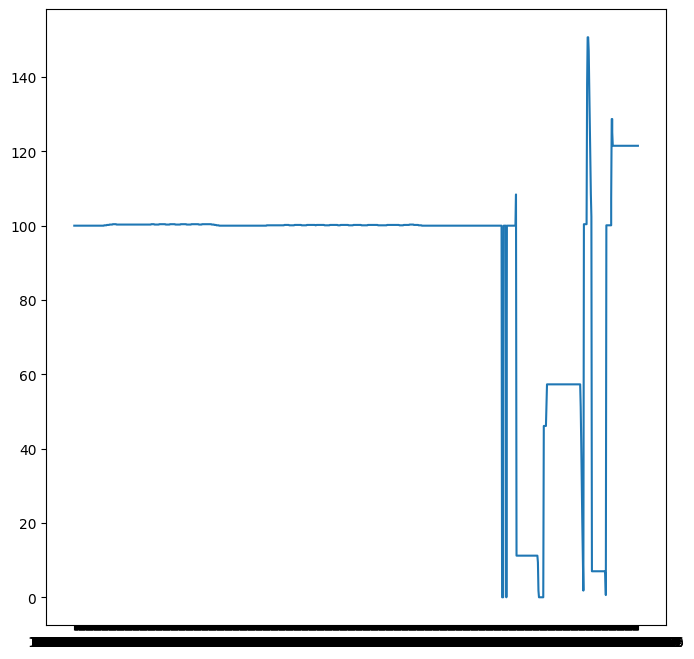

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(js['time'], js['data'], label='x')
plt.show()
filtered_z = js["data"]

In [ ]:
import numpy as np
filter_kernel = np.ones(10) / 10
data = js["data"]
filtered_z = np.convolve(data,
                             filter_kernel,
                             'same')
print(filtered_z)

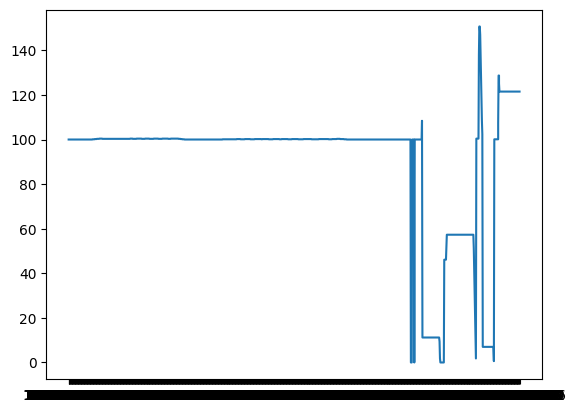

In [3]:
# plt.figure(figsize=(8, 8))
plt.plot(js['time'], filtered_z)
plt.show()

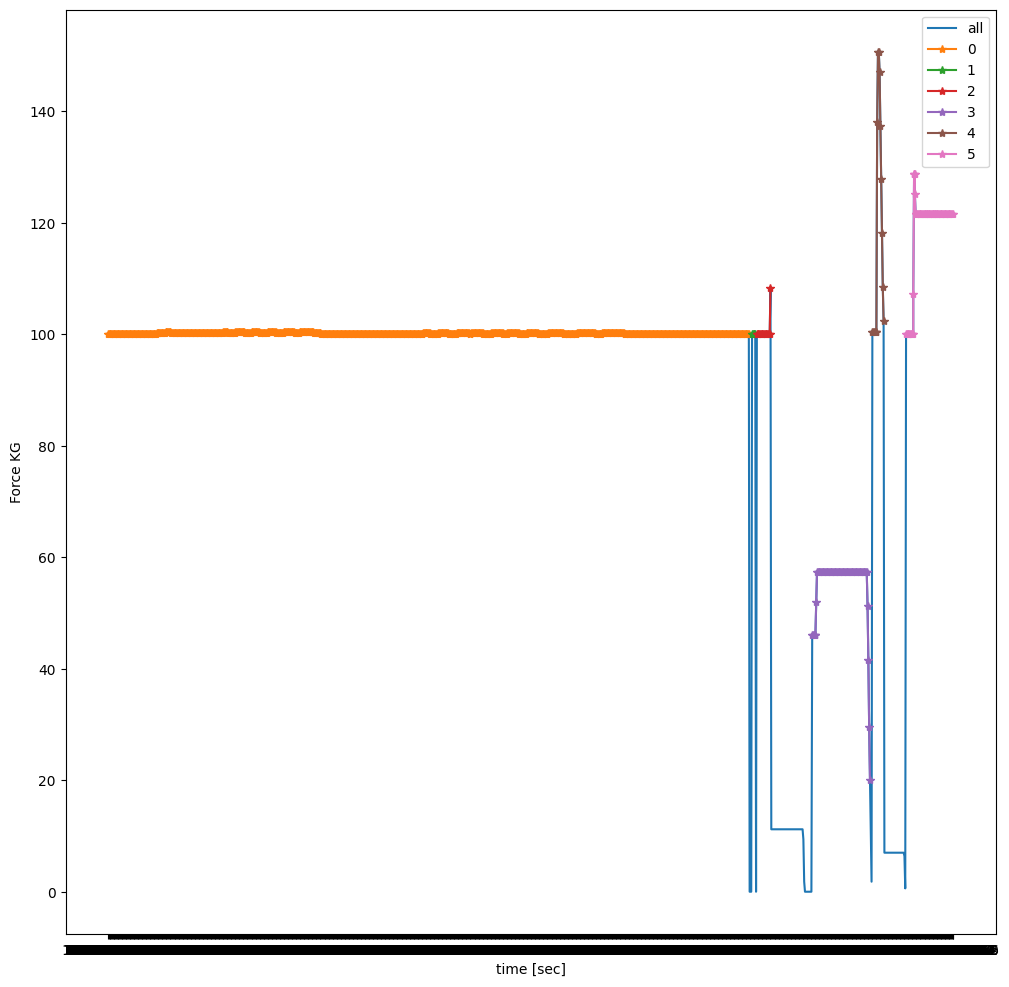

In [4]:
from scipy.signal import find_peaks
def identify_reps(force_data):
    upward_thresh = 12.0
    z_acc = force_data

    # We want to the start and end location of every consecutive sequence of measurement above our threshold

    # Note: scipy.signal.find_peaks would accomplish this, but feel magical. So we do out ourselves.

    segment_start_locations = []
    segment_end_locations = []
    segment_started = False
    for index, acc_value in enumerate(z_acc):
        if acc_value > upward_thresh:
            # if this is the first time we're encountering a high accelreation, write down that we identify a new segment start:
            if not segment_started:
                segment_start_locations.append(index)
            segment_started = True

        if acc_value < upward_thresh:
            # if we're already inside a segment and observed a low acceleration, mark that the segment has ended
            if segment_started:
                segment_end_locations.append(index)
            segment_started = False
    # handle edge case: if the recording ends with high accleeration, we end the last segment segment
    if segment_started:
        segment_end_locations.append(index)

    return (segment_start_locations, segment_end_locations)

segment_starts, segment_ends = identify_reps(filtered_z)
t = js['time']
z = filtered_z
# peaks2, t = find_peaks(z, prominence=1)      # BEST!
plt.figure(figsize=(12, 12))
plt.plot(t, z, label='all')
i = 0
for start_loc,end_loc in zip(segment_starts, segment_ends):
    plt.plot(t[start_loc:end_loc], z[start_loc:end_loc], label=str(i), marker='*')
    i+=1
plt.xlabel('time [sec]')
plt.ylabel('Force KG')
plt.legend()
plt.show()

In [1]:
real_time_z = []
time = []

i = 0
while i < len(z):
    real_time_z.append(z[i])
    time.append(t[i])
    i = i + 1

    if len(real_time_z) > 10:
        segment_starts, segment_ends = identify_reps(real_time_z)
        index = 0
        if len(segment_starts) > 0 and len(segment_ends) > 0:
            for start_loc,end_loc in zip(segment_starts, segment_ends):
                plt.plot(time[start_loc:end_loc], real_time_z[start_loc:end_loc], label=str(index), marker='*')
                index+=1
            plt.plot(time, real_time_z, label='all')
            plt.xlabel('time [sec]')
            plt.ylabel('Force KG')
            plt.legend()
            plt.show()




pydev debugger: Unable to find real location for: <string>
pydev debugger: Unable to find real location for: <frozen _collections_abc>
pydev debugger: Unable to find real location for: <frozen os>
pydev debugger: Unable to find real location for: /var/folders/fh/nqrs0_8961jb_37n8tp438x00000gn/T/ipykernel_75162/2551975679.py
pydev debugger: Unable to find real location for: <frozen importlib._bootstrap_external>
pydev debugger: Unable to find real location for: <frozen zipimport>
pydev debugger: Unable to find real location for: <frozen codecs>


NameError: name 'z' is not defined